<a href="https://colab.research.google.com/github/enc0des/Tensorflow-Zero-to-Hero/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification.


## Import Data

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Training Set

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels.shape

(60000,)

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

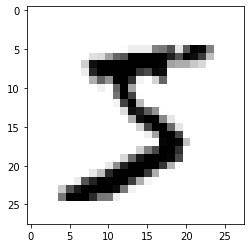

Corresponding label : 
5


In [6]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print("Corresponding label : ")
print(train_labels[0])

## Test Set

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
test_labels.shape

(10000,)

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

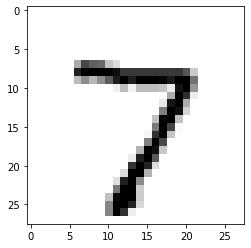

Corresponding label : 
7


In [11]:
digit = test_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

print("Corresponding label : ")
print(test_labels[0])

## The network architecture

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([

    layers.Dense(512, activation= 'relu'),
    layers.Dense(10,  activation= 'softmax')
])

## Compilation

 - An **optimizer** — The mechanism through which the model will update itself based on the
training data it sees, so as to improve its performance.
 - A **loss** function — How the model will be able to measure its performance on the training
data, and thus how it will be able to steer itself in the right direction.
 - **Metrics** to monitor during training and testing — Here, we’ll only care about accuracy
(the fraction of the images that were correctly classified)

In [13]:
model.compile(          
              optimizer='rmsprop', #    >>  Default.
              loss=    'sparse_categorical_crossentropy',
              metrics= ['accuracy']
)

## Preparing the image data 

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
import numpy
help(numpy.ndarray.astype)

Help on method_descriptor:

astype(...)
    a.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    
    Copy of the array, cast to a specified type.
    
    Parameters
    ----------
    dtype : str or dtype
        Typecode or data-type to which the array is cast.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout order of the result.
        'C' means C order, 'F' means Fortran order, 'A'
        means 'F' order if all the arrays are Fortran contiguous,
        'C' order otherwise, and 'K' means as close to the
        order the array elements appear in memory as possible.
        Default is 'K'.
    casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
        Controls what kind of data casting may occur. Defaults to 'unsafe'
        for backwards compatibility.
    
          * 'no' means the data types should not be cast at all.
          * 'equiv' means only byte-order changes are allowed.
          * 'safe' means only cas

In [16]:
train_images.shape

(60000, 784)

## Model Fitting

In [17]:
model.fit(
    train_images,
    train_labels,
    epochs= 5,
    batch_size= 128
)

Epoch 1/5
469/469 [==============================] - 10s 17ms/step - loss: 0.2584 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 8s 17ms/step - loss: 0.1036 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0688 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0498 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9885


## Predictions

In [18]:
test_digits = test_images[0:10]

predictions = model.predict( test_digits )

print(predictions.shape,'\n')


(10, 10) 



In [19]:
predictions[0]

array([9.6166175e-10, 1.4197917e-09, 1.9883082e-07, 2.0943130e-06,
       1.0870176e-12, 6.6301844e-09, 1.0457525e-14, 9.9999750e-01,
       6.5391563e-09, 1.3409399e-07], dtype=float32)

In [20]:
predictions[0].argmax()

7

In [21]:
predictions[0][7]

0.9999975

In [22]:
test_labels[0]

7

## Evaluation

In [23]:
test_loss, test_acc = model.evaluate(
    test_images,
    test_labels
)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9785


In [24]:
print("Test Accuracy: ",( test_acc * 100 )//1, "%")

Test Accuracy:  97.0 %
